## Homework

In this homework, we'll deploy the ride duration model in batch mode. Like in homework 1, we'll use the Yellow Taxi Trip Records dataset. 

You'll find the starter code in the [homework](homework) directory.


## Q1. Notebook

We'll start with the same notebook we ended up with in homework 1.
We cleaned it a little bit and kept only the scoring part. You can find the initial notebook [here](homework/starter.ipynb).

Run this notebook for the February 2022 data.

What's the standard deviation of the predicted duration for this dataset?

* `5.28`
* 10.28
* 15.28
* 20.28


## Q2. Preparing the output

Like in the course videos, we want to prepare the dataframe with the output. 

First, let's create an artificial `ride_id` column:

```python
df['ride_id'] = f'{year:04d}/{month:02d}_' + df.index.astype('str')
```

Next, write the ride id and the predictions to a dataframe with results. 

Save it as parquet:

```python
df_result.to_parquet(
    output_file,
    engine='pyarrow',
    compression=None,
    index=False
)
```

What's the size of the output file?

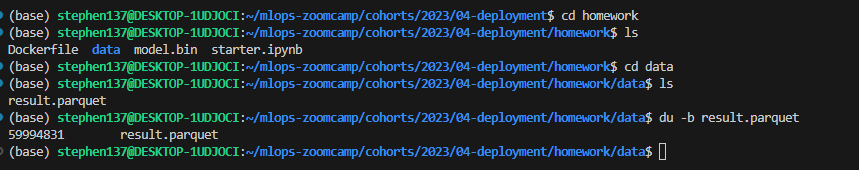

* 28M
* 38M
* 48M
* `58M` # 60M so closest value chosen

__Note:__ Make sure you use the snippet above for saving the file. It should contain only these two columns. For this question, don't change the
dtypes of the columns and use pyarrow, not fastparquet. 


## Q3. Creating the scoring script

Now let's turn the notebook into a script. 

Which command you need to execute for that?

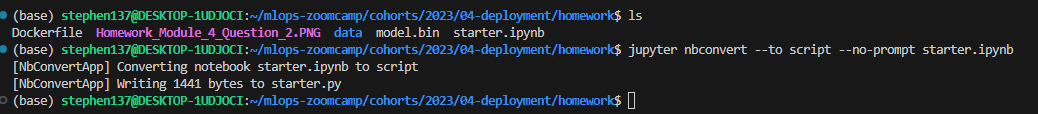


## Q4. Virtual environment

Now let's put everything into a virtual environment. We'll use pipenv for that.

Install all the required libraries. Pay attention to the Scikit-Learn version:
check the starter notebook for details. 

After installing the libraries, pipenv creates two files: `Pipfile`
and `Pipfile.lock`. The `Pipfile.lock` file keeps the hashes of the
dependencies we use for the virtual env.

What's the first hash for the Scikit-Learn dependency?

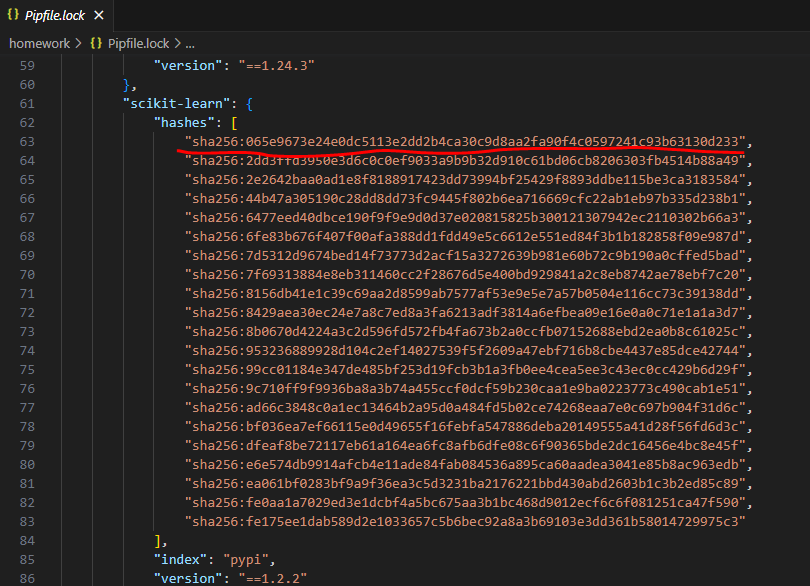


## Q5. Parametrize the script

Let's now make the script configurable via CLI. We'll create two 
parameters: year and month.

Run the script for March 2022. 

What's the mean predicted duration? 

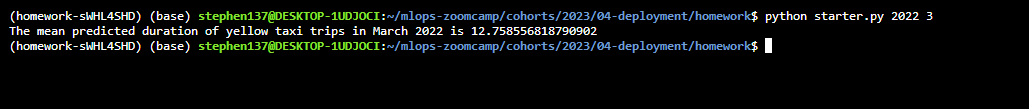

* 7.76
* `12.76`
* 17.76
* 22.76

Hint: just add a print statement to your script.


## Q6. Docker container 

Finally, we'll package the script in the docker container. 
For that, you'll need to use a base image that we prepared. 

This is how it looks like:

```
FROM python:3.10.0-slim

WORKDIR /app
COPY [ "model2.bin", "model.bin" ]
```

(see [`homework/Dockerfile`](homework/Dockerfile))

We pushed it to [`svizor/zoomcamp-model:mlops-3.10.0-slim`](https://hub.docker.com/layers/svizor/zoomcamp-model/mlops-3.10.0-slim/images/sha256-595bf690875f5b9075550b61c609be10f05e6915609ef4ea4ce9797116c99eff?context=repo),
which you should use as your base image.

That is, this is how your Dockerfile should start:

```docker
FROM svizor/zoomcamp-model:mlops-3.10.0-slim

# do stuff here
```

This image already has a pickle file with a dictionary vectorizer
and a model. You will need to use them.

Important: don't copy the model to the docker image. You will need
to use the pickle file already in the image. 

Now run the script with docker. What's the mean predicted duration
for April 2022? 

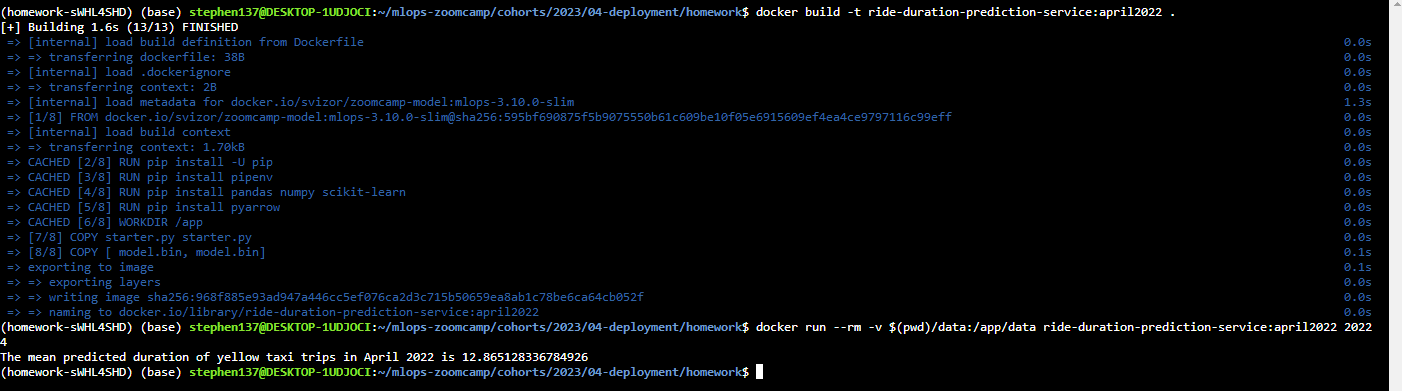


* 7.92
* `12.83` # closest value
* 17.92
* 22.83


## Bonus: upload the result to the cloud (Not graded)

Just printing the mean duration inside the docker image 
doesn't seem very practical. Typically, after creating the output 
file, we upload it to the cloud storage.

Modify your code to upload the parquet file to S3/GCS/etc.


## Publishing the image to dockerhub

This is how we published the image to Docker hub:

```bash
docker build -t mlops-zoomcamp-model:v1 .
docker tag mlops-zoomcamp-model:v1 svizor/zoomcamp-model:mlops-3.10.0-slim
docker push svizor/zoomcamp-model:mlops-3.10.0-slim
```


## Submit the results

* Submit your results here: https://forms.gle/4tnqB5yGeMrTtKKa6
* It's possible that your answers won't match exactly. If it's the case, select the closest one.
* You can submit your answers multiple times. In this case, the last submission will be used for scoring.


## Deadline

The deadline for submitting is 19 June 2023 (Monday) 23:00 CEST. 
After that, the form will be closed.
